# Feed Forward Neural Network

# Neural Network

A neural network is a machine learning model that is inspired by the human brain ***This the common definition given by all***

It is a type of machine learning process, called deep learing that uses interconnected nodes or neurons in a layered structure that resembles the human brain.

Typically, a Neural Network looks like <br>
*Source: IBM*
<br>
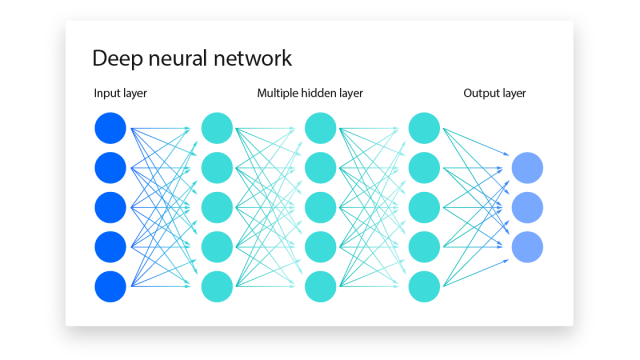
## Why Neural Networks are important?
Neural networks can help computers make intelligent decisions with limited human assistance. This is because they can learn and model the relationships between input and output data that are nonlinear and complex.

## Where the neural networks can be used?

1.   Image Classification
2.   Image Recognition
3. Data Forecasting
4. Anamoly Detection
5. Computer Vision
6. ASR (Automatic Speech Recognition)
7. NLP (Natural Language Processing)









## Feed Forward Neural Network

A feedforward neural network (FNN) is one of the two broad types of artificial neural network, characterized by direction of the flow of information between its layers. Its flow is uni-directional, meaning that the information in the model flows in only one direction—forward—from the input nodes, through the hidden nodes (if any) and to the output nodes, without any cycles or loops.

Typically, a feed forward neural network will look like <br>
*Source: Wikipedia* <br>

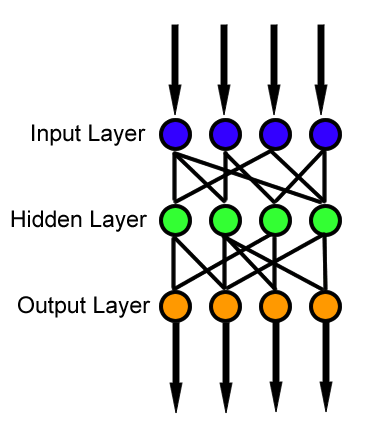

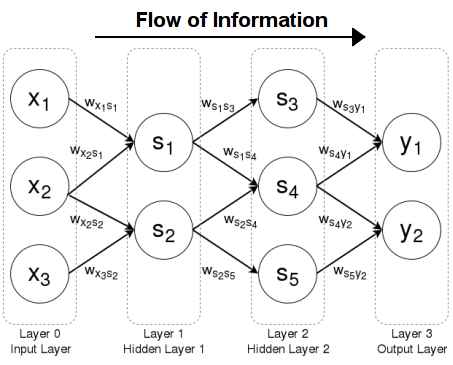

# Task 1 - Regression Model using Feed Forward Neural Network

## Let's import necessary modules first

In [20]:
# Importing necessary modules for feed forward neural networks
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Import the dataset
Here, there are two datasets used


1.   Virtual Asset Analysis - Crytpocurrency forecasting (BNB) Data
2.   Heart Diseases Classification using given attributes



In [21]:
dataset_1 = pd.read_csv("BNB-USD.csv")
#head will product the top data of the dataset
dataset_1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-09-13,1.042900,1.042900,0.880241,0.937204,0.937204,2780700.0
1,2017-09-14,0.937870,0.950177,0.673482,0.678784,0.678784,3134360.0
2,2017-09-15,0.683305,0.849217,0.526755,0.799709,0.799709,4625680.0
3,2017-09-16,0.808056,0.927197,0.746113,0.804198,0.804198,2829570.0
4,2017-09-17,0.803423,0.814797,0.733745,0.789589,0.789589,1273640.0


In [22]:
dataset_1.describe() #describe will provide the attributes of the dataset and their mathematics calculation

,Open,High,Low,Close,Adj Close,Volume
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1.458000e+03
mean,69.329030,72.641543,65.937712,69.606288,69.606288,7.110796e+08
std,134.418804,141.083640,127.435789,134.710070,134.710070,1.501431e+09
min,0.683305,0.740154,0.526755,0.678784,0.678784,9.284000e+03
25%,11.067950,11.415700,10.401825,11.068575,11.068575,6.752167e+07
50%,17.059471,17.467134,16.489868,17.044519,17.044519,2.144618e+08
75%,29.513170,30.341477,28.745466,29.522172,29.522172,4.343310e+08
max,676.315918,690.931946,631.465271,675.684082,675.684082,1.798295e+10


After analysing the dataset, the **Date** Column in the Dataset is not needed for the training. So, let's remove the column **Date** from the Dataset

In [23]:
#let's remove the date column
dataset_1.drop(['Date'], axis = 1, inplace = True)
dataset_1.head()

,Open,High,Low,Close,Adj Close,Volume
0,1.042900,1.042900,0.880241,0.937204,0.937204,2780700.0
1,0.937870,0.950177,0.673482,0.678784,0.678784,3134360.0
2,0.683305,0.849217,0.526755,0.799709,0.799709,4625680.0
3,0.808056,0.927197,0.746113,0.804198,0.804198,2829570.0
4,0.803423,0.814797,0.733745,0.789589,0.789589,1273640.0


In [24]:
# Let's find the number of entries in the dataset
dataset_1.count()

Open         1458
High         1458
Low          1458
Close        1458
Adj Close    1458
Volume       1458
dtype: int64

1030 is the count pretty much small, but as of now, it is ok for beginners as guess.
If you need more data, think about Data Augmentation Technique.

## Data Augmentation
Data augmentation is a technique that increases the amount of data by creating new data points from existing data. It can involve making minor changes to the dataset or using machine learning to generate new data points.

This is how the data augmentation works (***See the Diagram***) <br>

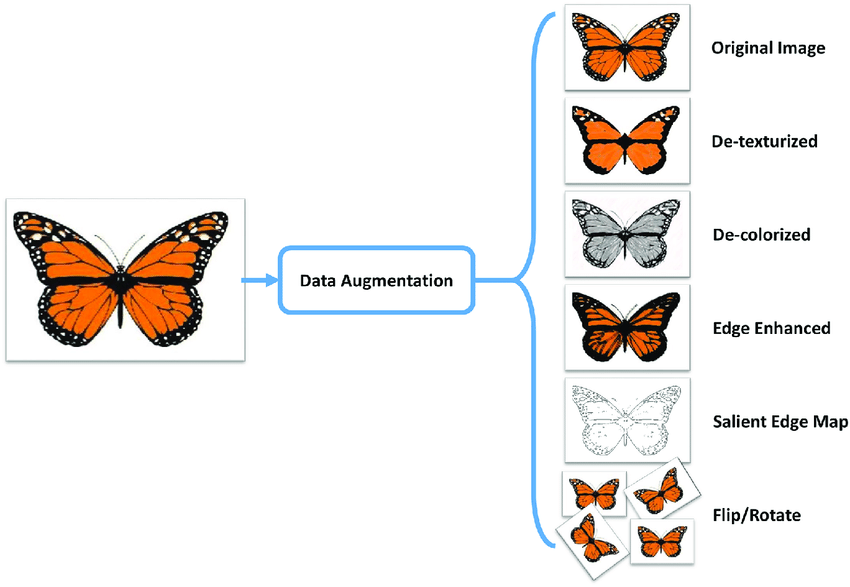

<br>

## Preprocessing the Dataset


In [25]:
# Let's do preprocessing before entering into the model

#Step1 - Check is there is any null (na) value
print("Checking the Columns is there is any null values:\n",dataset_1.isnull())
print("Finding the total sum of na values in the dataset:\n", dataset_1.isnull().sum())

Checking the Columns is there is any null values:
        Open   High    Low  Close  Adj Close  Volume
0     False  False  False  False      False   False
1     False  False  False  False      False   False
2     False  False  False  False      False   False
3     False  False  False  False      False   False
4     False  False  False  False      False   False
...     ...    ...    ...    ...        ...     ...
1457  False  False  False  False      False   False
1458  False  False  False  False      False   False
1459  False  False  False  False      False   False
1460  False  False  False  False      False   False
1461  False  False  False  False      False   False

[1462 rows x 6 columns]
Finding the total sum of na values in the dataset:
 Open         4
High         4
Low          4
Close        4
Adj Close    4
Volume       4
dtype: int64


Fortunately, there are no null values in the dataset, but this case will not be similar to all the datasets
So the dataset should be pre-processed (Preprocess the null value)

Ways to pre-process the null value
1. Remove the null values (Might loss the accuracy)
2. Replacing the null value with the mean of the column (best way)

In [26]:
# For Preprocessing
from sklearn.impute import SimpleImputer

def preprocess_data(X_train, X_test, y_train, y_test):
  imputer = SimpleImputer(strategy = 'constant')
  X_train= imputer.fit_transform(X_train)
  X_test = imputer.fit_transform(X_test)
  y_train= imputer.fit_transform(np.array(y_train).reshape(-1,1))
  y_test= imputer.fit_transform(np.array(y_test).reshape(-1,1))
  return X_train, X_test, y_train, y_test

Before building the model, it is very important for the Machine Learning Engineer to find what are all the attributes that can help to predict the target.

The process to find the matching ration between the features is termed as correlation coefficient (in my words)

**Actual Definition:** A correlation coefficient is a numerical measurement of the statistical relationship between two variables. The most common way to measure a linear correlation is the Pearson correlation coefficient (r). This coefficient is a number between -1 and 1 that measures the strength and direction of the relationship between two variables.

The formula to calculate the correlation coefficient is given by <br>
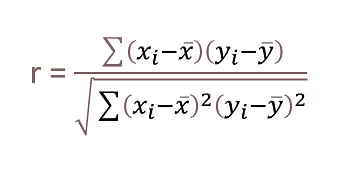

In [27]:
# Let's find the input features and output targets
columns = dataset_1.columns
y = dataset_1['Close']
print("Correlation Score --: \n")
for i in columns:
      print(f'{i} correlation Score --: {dataset_1[i].corr(y)}')

Correlation Score --: 

Open correlation Score --: 0.9963492948905939
High correlation Score --: 0.998408125283854
Low correlation Score --: 0.9982550684150118
Close correlation Score --: 1.0
Adj Close correlation Score --: 1.0
Volume correlation Score --: 0.7979774352740394


From the correlation score, the features **Open, High, Low** have highest score when matched with teh Close feature. So, the input features are the features that has highest correlation score with the output target.

In [28]:
input_features_columns = ['Open','High','Low']
input_features = dataset_1[input_features_columns]
output_targets = dataset_1.Close

## Split the Dataset into training and testing
Usually, the dataset should be split into three categories

1.   Training Data
2.   Testing Data
3.   Validation Data

The ratio of those split is given below <br>
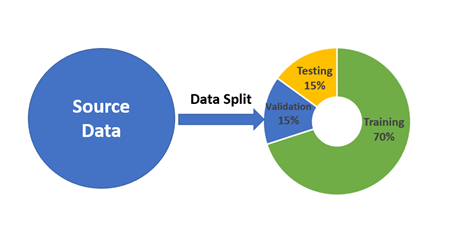



In [29]:
# Let's import scikit learn packages to split the data into testing and training
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(input_features, output_targets, test_size = 0.3, random_state = 42 )

# Let's print the data
print("\t \t \t \t Overall Notice \n \n \n")

print("\t \t The total number of records in Dataset: ",dataset_1.shape)
print("\t \t -----------------------------------------------------------")
print(f'\t \t The total number of training records for input parameters: {X_train.shape}')
print("\t \t -----------------------------------------------------------")
print(f'\t \t The total number of validation records for input parameters:{X_test.shape}')
print("\t \t -----------------------------------------------------------")

	 	 	 	 Overall Notice 
 
 

	 	 The total number of records in Dataset:  (1462, 6)
	 	 -----------------------------------------------------------
	 	 The total number of training records for input parameters: (1023, 3)
	 	 -----------------------------------------------------------
	 	 The total number of validation records for input parameters:(439, 3)
	 	 -----------------------------------------------------------


## Let's Build the Model

In [30]:
#Let's import necessary models for Feed Forward Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
!pip install visualkeras
import visualkeras

## Model Creation

A Simple Feed Forward Neural Network Model is being created as shown below
<br>

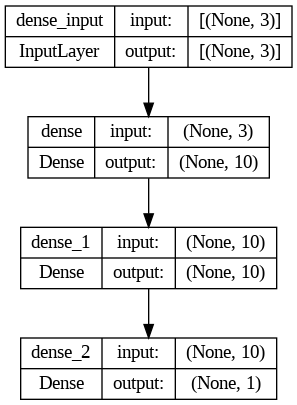

In [31]:
# Let's create a model
def feed_forward_model(X_train):
  model = Sequential()
  model.add(Dense(input_dim = X_train.shape[1],units = 10,activation = 'relu'))
  model.add(Dense(input_dim = X_train.shape[1],units =10,activation = 'relu'))
  model.add(Dense(input_dim = 10, units = 1,activation = 'linear'))
  model.compile(loss="mean_absolute_error",optimizer = "adam")
  return model

In [32]:
X_train, X_test, y_train, y_test = preprocess_data(X_train, X_test, y_train, y_test)
model = feed_forward_model(X_train)
model.fit(X_train, y_train, epochs = 10, verbose = 20,batch_size = 32)
model.summary()
plot_model(model, show_shapes=True, show_layer_names=True)
visualkeras.layered_view(model)

Epoch 1/10
Epoch 2/10
Epoch 3/10
Epoch 4/10
Epoch 5/10
Epoch 6/10
Epoch 7/10
Epoch 8/10
Epoch 9/10
Epoch 10/10
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                40        
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 161 (644.00 Byte)
Trainable params: 161 (644.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Prediction with Test Data

In [33]:
prediction = model.predict(X_test)

14/14 [==============================] - 0s 3ms/step


## Evaluate the Model using Evaluation Metrics

The model what we have created is the regression model. The evaluation metrics used here are listed below


1.   Mean Absolute Error  
2.   Mean Squared Error
3.   Mean Absolute Percentage Error
4.   Regression Score
5.   Mean Relative Error
6.   Root Mean Squared Error



In [34]:
# Let's evaluate the model using Evaluation Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score
from tensorflow.keras.metrics import MeanRelativeError, RootMeanSquaredError
train_evaluate = model.evaluate(X_train, y_train, batch_size=32)
test_evaluate = model.evaluate(X_test, y_test, batch_size=32)

14/14 [==============================] - 0s 2ms/step - loss: 2.1138


In [35]:
## Feed Forward Neural Network Model Evaluation Metrics
print("\t \t \t XGBoost Regressor Evaluation Metrics \n \n")
print(f' \t \t Mean Absolute Error (MAE) --: {mean_absolute_error(y_test,prediction)}')
print(f'\t \t Mean Squared Error (MSE) --: {mean_squared_error(y_test,prediction)}')
print(f'\t \t Mean absolute percentage error (MAPE) --: {mean_absolute_percentage_error(y_test,prediction)}')

mre = MeanRelativeError(normalizer = y_test)
mre.update_state(y_test,prediction)
print(f'\t \t Mean Relative Error (MRE) --: {mre.result().numpy()}')

mse = RootMeanSquaredError()
mse.update_state(y_test,prediction)
print(f'\t \t Root Mean Squared Error (RMSE) --: {mse.result().numpy()}')

print(f'\t \t R2 Score --: {r2_score(y_test,prediction)}')

	 	 	 XGBoost Regressor Evaluation Metrics 
 

 	 	 Mean Absolute Error (MAE) --: 2.1137672669284964
	 	 Mean Squared Error (MSE) --: 33.78940860741521
	 	 Mean absolute percentage error (MAPE) --: 0.029249414763644253
	 	 Mean Relative Error (MRE) --: 0.029249414801597595
	 	 Root Mean Squared Error (RMSE) --: 5.812865734100342
	 	 R2 Score --: 0.998142705360306


# Task 2 - Classification Model using Feed Forward Neural Network

In [36]:
#let's import the dataset
dataset_2 = pd.read_csv("SAheart.data")
dataset_2.head()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,1,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,2,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,3,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,4,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,5,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


In [37]:
dataset_2.describe()

,row.names,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age,chd
count,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000,462.000000
mean,231.935065,138.326840,3.635649,4.740325,25.406732,53.103896,26.044113,17.044394,42.816017,0.346320
std,133.938585,20.496317,4.593024,2.070909,7.780699,9.817534,4.213680,24.481059,14.608956,0.476313
min,1.000000,101.000000,0.000000,0.980000,6.740000,13.000000,14.700000,0.000000,15.000000,0.000000
25%,116.250000,124.000000,0.052500,3.282500,19.775000,47.000000,22.985000,0.510000,31.000000,0.000000
50%,231.500000,134.000000,2.000000,4.340000,26.115000,53.000000,25.805000,7.510000,45.000000,0.000000
75%,347.750000,148.000000,5.500000,5.790000,31.227500,60.000000,28.497500,23.892500,55.000000,1.000000
max,463.000000,218.000000,31.200000,15.330000,42.490000,78.000000,46.580000,147.190000,64.000000,1.000000


In [38]:
dataset_2.isna()

,row.names,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
457,False,False,False,False,False,False,False,False,False,False,False
458,False,False,False,False,False,False,False,False,False,False,False
459,False,False,False,False,False,False,False,False,False,False,False
460,False,False,False,False,False,False,False,False,False,False,False


In [39]:
dataset_2.isna().sum()

row.names    0
sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

In [40]:
dataset_2.drop(columns = 'row.names',index = 1, inplace = True)
dataset_2.head()

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1
5,132,6.20,6.47,36.21,Present,62,30.77,14.14,45,0


## Preprocess the dataset

In [41]:
#CounterVectorizer Convert the text into matrics
from sklearn.impute import SimpleImputer

def preprocess_data(X_train, X_test):
  imputer = SimpleImputer(strategy = 'constant')
  X_train= imputer.fit_transform(X_train)
  X_test = imputer.fit_transform(X_test)
  return X_train, X_test

Find the input features and output targets
Here, after analysing the data, the input features and output targets are analysed

In [42]:
features = ['adiposity', 'age']
input_features = dataset_2[features]
response = 'chd'
output_targets = dataset_2[response]

## Split the dataset into training and testing

In [43]:
X_train, X_test, y_train, y_test = train_test_split(input_features, output_targets, test_size = 0.3, random_state = 42)

# Let's print the data
print("\t \t \t \t Overall Notice \n \n \n")

print("\t \t The total number of records in Dataset: ",dataset_2.shape)
print("\t \t -----------------------------------------------------------")
print(f'\t \t The total number of training records for input parameters: {X_train.shape}')
print("\t \t -----------------------------------------------------------")
print(f'\t \t The total number of validation records for input parameters:{X_test.shape}')
print("\t \t -----------------------------------------------------------")

	 	 	 	 Overall Notice 
 
 

	 	 The total number of records in Dataset:  (461, 10)
	 	 -----------------------------------------------------------
	 	 The total number of training records for input parameters: (322, 2)
	 	 -----------------------------------------------------------
	 	 The total number of validation records for input parameters:(139, 2)
	 	 -----------------------------------------------------------


# Let's Build a Model

A small difference from the regression model is the activation function used in the last layer of the model. Usually, in regression, the activation function **linear** is used. For Classification, there are two activation functions generally

1.   Sigmoid Activation function -- Generally for two class classification
2.   Softmax Activation function -- Generally for multi-class classification (Probability based)



In [44]:
#let's build a classification feed forward neural network model
def classification_model(X_train):
  model = Sequential()
  model.add(Dense(input_dim = X_train.shape[1],units =10,activation = 'relu'))
  model.add(Dense(input_dim = X_train.shape[1],units =10,activation = 'relu'))
  model.add(Dense(input_dim = 10, units = 1,activation = 'sigmoid'))
  model.compile(loss='binary_crossentropy',metrics = ['accuracy'],optimizer = "sgd")
  return model

## Let's train the model

In [45]:
model_2 = classification_model(X_train)
model_2.fit(X_train, y_train, epochs = 20)
model_2.summary()
plot_model(model_2, to_file='model2_plot.png', show_shapes=True, show_layer_names=True)
visualkeras.layered_view(model)

Epoch 1/20
11/11 [==============================] - 1s 2ms/step - loss: 2.8088 - accuracy: 0.5124
Epoch 2/20
11/11 [==============================] - 0s 2ms/step - loss: 1.1570 - accuracy: 0.5528
Epoch 3/20
11/11 [==============================] - 0s 2ms/step - loss: 0.7406 - accuracy: 0.5466
Epoch 4/20
11/11 [==============================] - 0s 2ms/step - loss: 0.8463 - accuracy: 0.6056
Epoch 5/20
11/11 [==============================] - 0s 2ms/step - loss: 0.7458 - accuracy: 0.5963
Epoch 6/20
11/11 [==============================] - 0s 2ms/step - loss: 0.7219 - accuracy: 0.5745
Epoch 7/20
11/11 [==============================] - 0s 2ms/step - loss: 0.6650 - accuracy: 0.6056
Epoch 8/20
11/11 [==============================] - 0s 2ms/step - loss: 0.6677 - accuracy: 0.6335
Epoch 9/20
11/11 [==============================] - 0s 2ms/step - loss: 0.7154 - accuracy: 0.6366
Epoch 10/20
11/11 [==============================] - 0s 2ms/step - loss: 0.6638 - accuracy: 0.5963
Epoch 11/20
11/11 [

## Let's test the model with test data

In [46]:
train_evaluate = model_2.evaluate(X_train, y_train, batch_size=32)
test_evaluate = model_2.evaluate(X_test, y_test, batch_size=32)
prediction = model_2.predict(X_test)
for i in range(len(prediction)):
  prediction[i] = int(prediction[i])

5/5 [==============================] - 0s 2ms/step


<ipython-input-46-edc5858b0580>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  prediction[i] = int(prediction[i])


## Let's print the classification report

In [47]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77        87
           1       0.00      0.00      0.00        52

    accuracy                           0.63       139
   macro avg       0.31      0.50      0.38       139
weighted avg       0.39      0.63      0.48       139



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


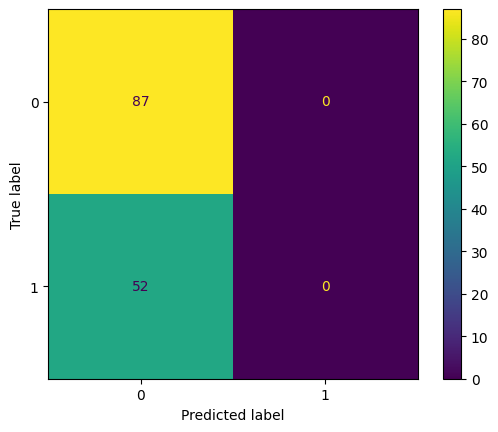

In [48]:
confusion_mat = confusion_matrix(y_test, prediction, labels = [0,1])
disp = ConfusionMatrixDisplay(confusion_matrix = confusion_mat, display_labels = [0,1])
disp.plot()